In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.api as sm

In [35]:
#load the data
tips=sns.load_dataset('tips')

In [37]:
print(tips.head())# display the first five rows

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [39]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [41]:
#selecting feature for simple linear regression
#we will predict tip based on total bill
x=tips[['total_bill']]#independent variable
y=tips['tip']#dependent variable

In [43]:
#split the dataset into train and test set(80-20 split)
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [45]:
#fit a simple linear regression model
model=LinearRegression()#class
model.fit(x_train,y_train)

LinearRegression()

In [47]:
#get model parameters
m= model.coef_[0]#slope
b=model.intercept_#intercept
print(f'regression equation: y={m:.2f}x+{b:.2f}')

regression equation: y=0.11x+0.93


In [49]:
#make prediction
y_pred=model.predict(x_test)

In [51]:
#evaluate the model performance
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print(f'mean squared error (mse):{mse:.2f}')
print(f'r-squared(r2): {r2:.2f}')

mean squared error (mse):0.57
r-squared(r2): 0.54


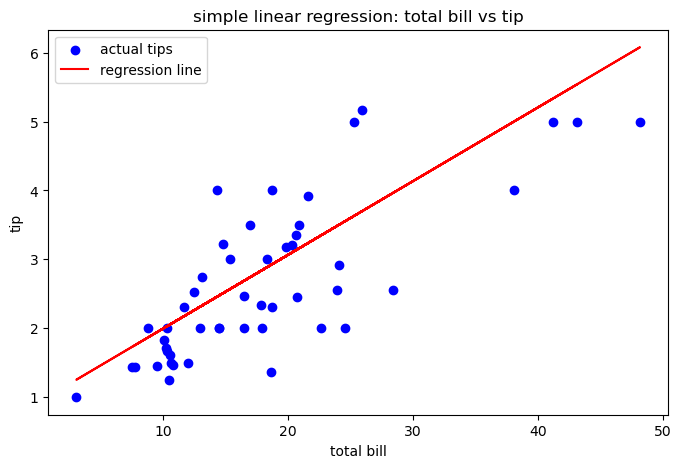

In [53]:
#visualization of regression line
plt.figure(figsize=(8,5)) 
plt.scatter(x_test, y_test, color='blue', label='actual tips')#scatter plot
plt.plot(x_test, y_pred, color='red', label='regression line')# linear regression
plt.xlabel('total bill')
plt.ylabel('tip')
plt.title('simple linear regression: total bill vs tip')
plt.legend()
plt.show()